# Introduction 

# Import Basic Libraries & Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects/financial_data.csv')

# Data Preprocessing

In [ ]:
# To get first five records
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
# To get number of Rows & Columns
df.shape

(17908, 21)

In [ ]:
# To get properties of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

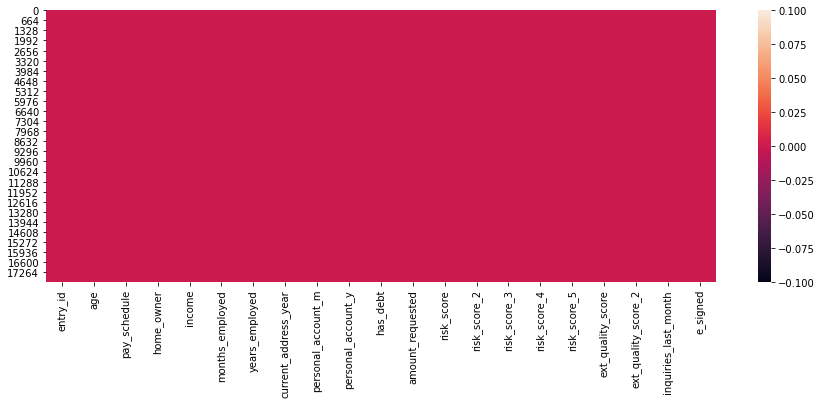

In [ ]:
# Visulization of null values by using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

entry_id                0.0
age                     0.0
pay_schedule            0.0
home_owner              0.0
income                  0.0
months_employed         0.0
years_employed          0.0
current_address_year    0.0
personal_account_m      0.0
personal_account_y      0.0
has_debt                0.0
amount_requested        0.0
risk_score              0.0
risk_score_2            0.0
risk_score_3            0.0
risk_score_4            0.0
risk_score_5            0.0
ext_quality_score       0.0
ext_quality_score_2     0.0
inquiries_last_month    0.0
e_signed                0.0
dtype: float64

In [ ]:
# Machine only knows numerical figures.
# In this dataset we have categorical("strings") values also.
# so we need to convert them into numerical values.
# For convertion form categorical values to Numerical values we need to have segrigate such values and put into 
# diffrent diffrent data frames.
df_cat=df.select_dtypes('object') 
df_num=df.select_dtypes(['int64','float64']) 

In [ ]:
# Convertion of categorical values to Numerical values.
# we have two methods for such process:
# 1] LabelEncoder
# 2] One Hot Encoder
# Here we will used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
# check LabelEncoder method applicable or not
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pay_schedule  17908 non-null  int64
dtypes: int64(1)
memory usage: 140.0 KB


In [ ]:
# Crete new data frame by concating categorical & numerical dataframe
new_df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
# Check new data frame
new_df.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,3
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,3
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,2


In [ ]:
# Drop unwanted Column
new_df.drop('entry_id',axis=1,inplace=True) 

In [ ]:
# check Unwanted column drop or not
new_df.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,3
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,3
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,2


# Split data into X & Y

In [ ]:
x=new_df.drop('e_signed',axis=1)
y=new_df['e_signed']

# Divide data for train(80%) & Test(20%)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling input data


In [ ]:
# There are two types of Scalling of data:
# 1] MinMax Scaller
# 2] Standard Scaller
# We will apply Standard Scaler to Scale our data set
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ..., -1.05738616,
         1.7844941 ,  1.68642348],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.67208556,
        -0.66336864,  0.06480367],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.84155028,
         1.2405246 , -0.74600624],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -1.44152051,
         0.42457036, -0.74600624],
       [ 1.08578982, -0.85634884, -0.69846323, ...,  0.84818866,
        -0.66336864,  0.87561358],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.7402435 ,
        -0.93535339, -0.74600624]])

In [ ]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.39963265,
         0.6965551 ,  0.87561358],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.06371543,
        -1.20733813, -0.74600624],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50342934,
        -0.39138389,  0.87561358],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.62224425,
        -0.93535339, -0.74600624],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.77242642,
        -0.66336864, -0.74600624],
       [-0.08997442, -0.85634884, -0.72176785, ...,  0.75896658,
        -0.11939914,  1.68642348]])

# Balancing of Output data

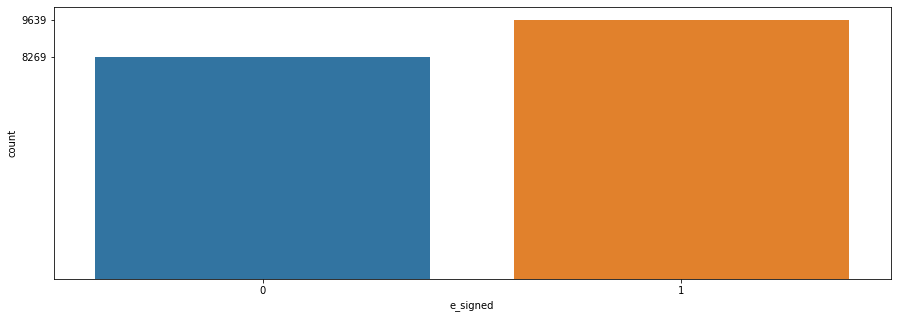

In [ ]:
#  Visualiztion of Output by using countplot
plt.figure(figsize=(15,5))
sns.countplot(data=new_df,x='e_signed') 
plt.yticks(new_df['e_signed'].value_counts())
plt.show()

In [ ]:
# Checking of output data
pd.Series(y_train).value_counts()


1    7711
0    6615
Name: e_signed, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

1    1928
0    1654
Name: e_signed, dtype: int64

In [ ]:
# by looking above two table its clearly indicating that output data is imbalance.
# here we need to balance output data,for this we have two methods:
# 1] Randomoversampling
# 2] Randomundersampling
# Here we will apply RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_train_sample,y_train_sample=ros.fit_resample(x_train,y_train)
x_test_sample,y_test_sample=ros.fit_resample(x_test,y_test)

In [ ]:
# Verifying sampling metod apply or not
pd.Series(y_train_sample).value_counts()

1    7711
0    7711
dtype: int64

In [ ]:
pd.Series(y_test_sample).value_counts()

1    1928
0    1928
dtype: int64

# Training of Model

In [ ]:
# Create user define function
def create_model(model):
  model.fit(x_train_sample,y_train_sample)
  y_pred=model.predict(x_test_sample)
  print(classification_report(y_test_sample,y_pred))
  print(confusion_matrix(y_test_sample,y_pred))
  return model

# 1] Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1928
           1       0.57      0.57      0.57      1928

    accuracy                           0.57      3856
   macro avg       0.57      0.57      0.57      3856
weighted avg       0.57      0.57      0.57      3856

[[1108  820]
 [ 824 1104]]


# 2] Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=0)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1928
           1       0.56      0.60      0.58      1928

    accuracy                           0.56      3856
   macro avg       0.57      0.56      0.56      3856
weighted avg       0.57      0.56      0.56      3856

[[1027  901]
 [ 777 1151]]


In [ ]:
dt2=DecisionTreeClassifier(max_depth=5)# purning technique
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      1928
           1       0.63      0.52      0.57      1928

    accuracy                           0.61      3856
   macro avg       0.61      0.61      0.60      3856
weighted avg       0.61      0.61      0.60      3856

[[1336  592]
 [ 929  999]]


In [ ]:
dt3=DecisionTreeClassifier(min_samples_leaf=60)# purning technique
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1928
           1       0.59      0.59      0.59      1928

    accuracy                           0.59      3856
   macro avg       0.59      0.59      0.59      3856
weighted avg       0.59      0.59      0.59      3856

[[1147  781]
 [ 797 1131]]


In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=55,criterion='entropy')# purning technique with Entropy
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1928
           1       0.58      0.56      0.57      1928

    accuracy                           0.58      3856
   macro avg       0.58      0.58      0.58      3856
weighted avg       0.58      0.58      0.58      3856

[[1151  777]
 [ 839 1089]]


# Ensembling Method

# 1] RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_features=10,random_state=0)
rfc=create_model(rfc)


              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1928
           1       0.63      0.66      0.64      1928

    accuracy                           0.63      3856
   macro avg       0.63      0.63      0.63      3856
weighted avg       0.63      0.63      0.63      3856

[[1173  755]
 [ 655 1273]]


# 2] XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=50)
xgb=create_model(xgb)


              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1928
           1       0.65      0.59      0.62      1928

    accuracy                           0.64      3856
   macro avg       0.64      0.64      0.63      3856
weighted avg       0.64      0.64      0.63      3856

[[1307  621]
 [ 786 1142]]


# HyperParameter Tuning
#  A hyperparameter is a parameter whose value is used to control the learning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={
    'lerningrate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[2,3,4,5,6,8,10,12,13,15],
    'min_child_weight':[2,3,5,8],
    'gamma':[0.00,0.1,0.2,0.3,0.4,0.5],
    'n_estimators':[100,200,300,400,500],
    'subsample':[0.5,0.7,1.0],
    'colsample':[0.3,0.4,0.5,0.6,0.7]
}

In [ ]:
rsc=RandomizedSearchCV(estimator=xgb,param_distributions=param,n_iter=5,n_jobs=-1,verbose=3)
rsc.fit(x_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=50,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1,...
                   param_distributions={'colsample': [0.3, 0.4, 0.5, 0.6, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                 

In [ ]:
rsc.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample=0.4,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.0, learning_rate=0.1, lerningrate=0.25, max_delta_step=0,
              max_depth=12, min_child_weight=2, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [ ]:
rsc.best_params_

{'colsample': 0.4,
 'gamma': 0.0,
 'lerningrate': 0.25,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.7}

# Final Model

In [ ]:
xgb1=XGBClassifier(base_score=0.5, booster='gbtree', colsample=0.4,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.0, learning_rate=0.1, lerningrate=0.25, max_delta_step=0,
              max_depth=12, min_child_weight=2, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [ ]:
xgb1=create_model(xgb1)

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1928
           1       0.62      0.67      0.64      1928

    accuracy                           0.63      3856
   macro avg       0.63      0.63      0.63      3856
weighted avg       0.63      0.63      0.63      3856

[[1121  807]
 [ 635 1293]]
